# Imports and Data Frame Creation

In [75]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
import seaborn as sns

In [76]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# '?' Entered into Data

In [77]:
for col in df.describe().columns:
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index
    df.loc[nanidx, col] = '?'

# Understanding the Data

In [78]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [79]:
df.describe()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,101684,71500,6,3,10,10,9,27,18,15,...,1,4,4,2,2,2,2,2,2,3
top,?,88785891,Caucasian,Female,[70-80),?,1,1,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
freq,83,40,76099,54708,26068,98569,53966,60191,57462,17756,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

In [81]:
df.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [82]:
for col in list(df.columns):
    print(df.loc[df[col] == '?'])

       encounter_id patient_nbr             race  gender       age    weight  \
1013              ?      377964  AfricanAmerican  Female   [40-50)         ?   
1094              ?      837414  AfricanAmerican    Male   [70-80)         ?   
1694              ?       38601        Caucasian    Male   [80-90)         ?   
1857              ?      463302        Caucasian  Female   [70-80)         ?   
2941              ?        5337        Caucasian    Male   [70-80)         ?   
3271              ?    22190364        Caucasian  Female   [50-60)         ?   
3940              ?     5927742        Caucasian    Male  [90-100)         ?   
4050              ?     5008581        Caucasian  Female   [70-80)         ?   
4313              ?   102911607        Caucasian  Female   [80-90)         ?   
4523              ?     3702339        Caucasian  Female   [80-90)         ?   
5602              ?      372744  AfricanAmerican    Male   [60-70)         ?   
6650              ?      389637  African

In [83]:
list(df.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

# Replace '?' with NaN

In [84]:
df2 = df.replace('?', np.nan)

# Convert Objects to Floats

In [85]:
df2 = df2.astype({'time_in_hospital': 'float', 'num_lab_procedures': 'float', 'num_procedures': 'float',
                  'num_medications': 'float', 'number_outpatient': 'float', 'number_emergency': 'float',
                 'number_inpatient': 'float'}, copy = False)

In [86]:
df2.isnull().sum()*100/df2.isnull().count()

encounter_id                 0.081560
patient_nbr                  0.039306
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.041271
discharge_disposition_id     0.069768
admission_source_id          0.046184
time_in_hospital             0.002948
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.061907
num_procedures               0.091386
num_medications              0.002948
number_outpatient            0.026531
number_emergency             0.068785
number_inpatient             0.005896
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.083525
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [87]:
df2.weight.value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [88]:
df2 = df2.drop(columns = ['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'])

In [89]:
df2.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3.0,1.0,2.0,4.0,70.0,1.0,21.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1.0,1.0,7.0,5.0,73.0,0.0,12.0,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2.0,1.0,4.0,13.0,68.0,2.0,28.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3.0,3.0,4.0,12.0,33.0,3.0,18.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [90]:
df3 = df2.loc[:,['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']]


# Fill NaN with Column Mean

In [91]:
df3 = df2.fillna(df2.mean())
df3.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Visualizing Outliers

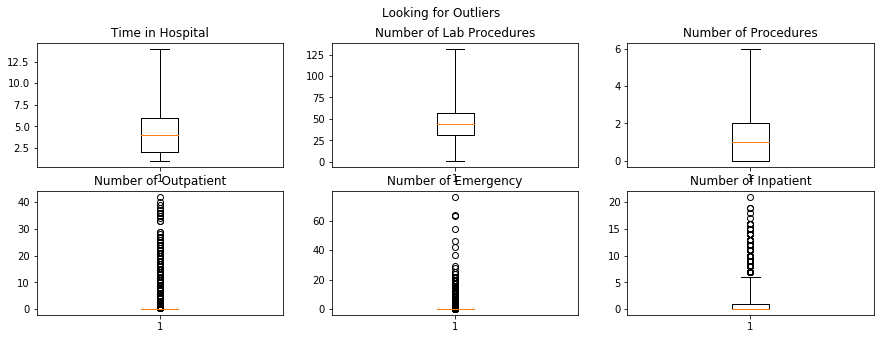

In [92]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(df3['number_outpatient'], whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(df3['number_emergency'], whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(df3['number_inpatient'], whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Looking for Outliers')
plt.show()

# Winsorizing Outliers

In [93]:
winsorized_number_outpatient = winsorize(df3['number_outpatient'], (0, .05))
winsorized_number_emergency = winsorize(df3['number_emergency'], (0, .05))
winsorized_number_inpatient = winsorize(df3['number_inpatient'], (0, .05))

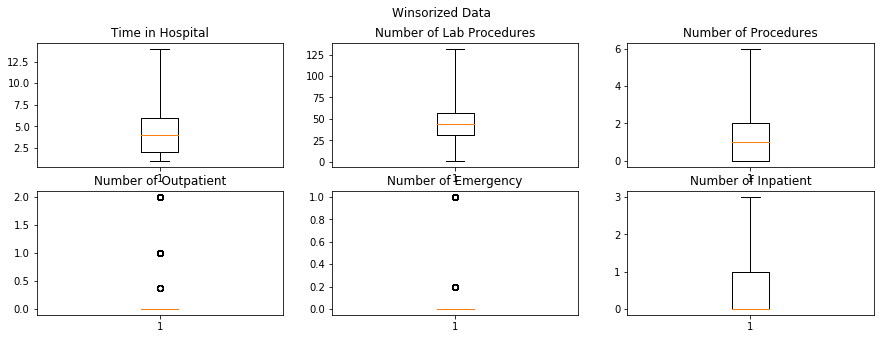

In [94]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(winsorized_number_outpatient, whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(winsorized_number_emergency, whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(winsorized_number_inpatient, whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Winsorized Data')
plt.show()

# Create df for numeric values

In [95]:
df_cat = df2.drop(columns = ['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient'])

In [96]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 39 columns):
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101724 non-null float64
discharge_disposition_id    101695 non-null float64
admission_source_id         101719 non-null float64
num_medications             101763 non-null float64
diag_1                      101745 non-null object
diag_2                      101408 non-null object
diag_3                      100343 non-null object
number_diagnoses            101681 non-null float64
max_glu_serum               101766 non-null object
A1Cresult                   101766 non-null object
metformin                   101766 non-null object
repaglinide                 101766 non-null object
nateglinide                 101766 non-null object
chlorpropamide              101766 non-null object
glimepiride       

In [97]:
for col in df_cat[df_cat.describe().columns]:
    mode = df_cat[col].mode()
    df_cat[col] = df_cat[col].fillna(mode)

In [98]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Try using multiple methods on the same data. How do your results differ depending on the order you do them?

1) It makes sense to use mean for imputation of numeric values

2) Depending on the categorical values, we could use mode for imputation

3) Separate the data in multiple dataframes based on numberical and categorical data then use the appropriate method for cleaning the data and then imputating the cleaned data. Finally, we can concantenate the cleaned dataframes into one dataframe and perform the respective analysis.

## Create Binary Column for Readmission 

In [99]:
df_cat['readmitted_binary'] = df_cat['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [100]:
df2['readmitted_binary'] = df2['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [101]:
# add readmission to df3
df3['readmitted_binary'] = df3['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [102]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,...,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


#Look at relationships between your input variables. Many models assume that your input variables are independent of each other. How true is that for this data set?

Continuous - continuous: correlation matrix

Continuous - categorical: T-test, ANOVA, etc. i.e. statistical significance tests

Categorical - categorical: Chi-square test

In [103]:
# continuous - continuous
df3.corr()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary
admission_type_id,1.000000,0.083461,0.106566,-0.012533,-0.143664,0.129942,0.079575,0.026563,-0.019175,-0.038099,-0.116954,-0.004929
discharge_disposition_id,0.083461,1.000000,0.018121,0.162725,0.023112,0.015955,0.108707,-0.008693,-0.024422,0.020653,0.047001,-0.014892
admission_source_id,0.106566,0.018121,1.000000,-0.007003,0.048903,-0.135222,-0.054532,0.027135,0.059684,0.036320,0.072241,0.039951
time_in_hospital,-0.012533,0.162725,-0.007003,1.000000,0.318310,0.191354,0.466106,-0.008891,-0.009787,0.073537,0.220170,0.051277
num_lab_procedures,-0.143664,0.023112,0.048903,0.318310,1.000000,0.058053,0.267938,-0.007397,-0.002073,0.039341,0.152806,0.039407
num_procedures,0.129942,0.015955,-0.135222,0.191354,0.058053,1.000000,0.385719,-0.024929,-0.038578,-0.066366,0.073599,-0.044771
num_medications,0.079575,0.108707,-0.054532,0.466106,0.267938,0.385719,1.000000,0.045227,0.013098,0.064198,0.261423,0.046739
number_outpatient,0.026563,-0.008693,0.027135,-0.008891,-0.007397,-0.024929,0.045227,1.000000,0.091375,0.107259,0.094155,0.082151
number_emergency,-0.019175,-0.024422,0.059684,-0.009787,-0.002073,-0.038578,0.013098,0.091375,1.000000,0.266466,0.055448,0.102939
number_inpatient,-0.038099,0.020653,0.036320,0.073537,0.039341,-0.066366,0.064198,0.107259,0.266466,1.000000,0.104656,0.217194


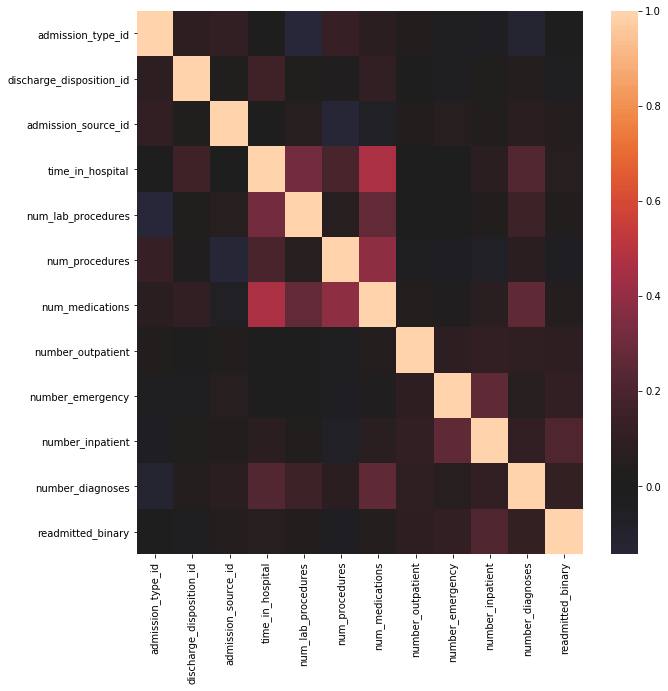

In [104]:
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(), center = 0)
plt.show()

In [105]:
# Continuous to categorical: t-test, ANOVA or boxen
# Categorical max_glu_serum , diabetesMed, time_in_hospital
df['ordinal_max_glu_serum'] = df['max_glu_serum'].map({'None': 0, 'Norm': 1, '>200': 2, '>300': 3})
df['ordinal_max_glu_serum'].value_counts()

0    96420
1     2597
2     1485
3     1264
Name: ordinal_max_glu_serum, dtype: int64

In [106]:
stats.shapiro(df['ordinal_max_glu_serum'].sample(5000))

(0.21732646226882935, 0.0)

In [107]:
# Categorical ordinal_ max_glu_serum, time_in_hospital
#stats.mannwhitneyu(df['ordinal_max_glu_serum'], df['time_in_hospital'])


In [108]:
df['diabetesMed'].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [109]:
# Continuous to categorical: t-test, ANOVA or boxen
# Categorical max_glu_serum , diabetesMed, time_in_hospital
df['ordinal_diabetesMed'] = df['diabetesMed'].map({'Yes': 1, 'No': 0})
df['ordinal_diabetesMed'].dropna()

0         0
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        0
23        0
24        1
25        1
26        1
27        1
28        1
29        1
         ..
101736    1
101737    1
101738    1
101739    1
101740    1
101741    0
101742    1
101743    1
101744    0
101745    1
101746    1
101747    1
101748    1
101749    1
101750    1
101751    1
101752    1
101753    1
101754    1
101755    1
101756    1
101757    1
101758    1
101759    1
101760    1
101761    1
101762    1
101763    1
101764    1
101765    0
Name: ordinal_diabetesMed, Length: 101766, dtype: int64

In [110]:
# Categorical ordinal_diabetesMed, time_in_hospital
stats.mannwhitneyu(df['ordinal_diabetesMed'], df['time_in_hospital'])

TypeError: '<' not supported between instances of 'int' and 'str'

In [111]:
# Categorical - categorical: Chi-square test
# Categorical: (age, weight)
aw_ct = pd.crosstab(df['age'],df['weight'])
aw_ct

weight,>200,?,[0-25),[100-125),[125-150),[150-175),[175-200),[25-50),[50-75),[75-100)
age,,,,,,,,,,
[0-10),0,156,3,0,0,0,0,2,0,0
[10-20),0,673,0,0,0,0,0,4,14,0
[20-30),0,1588,1,9,1,1,0,1,39,17
[30-40),1,3690,1,10,9,2,0,4,24,34
[40-50),0,9454,7,66,25,4,4,7,38,80
[50-60),0,16756,4,138,45,11,5,13,96,188
[60-70),2,21763,12,193,36,13,1,13,155,295
[70-80),0,25130,14,174,22,4,1,15,241,467
[80-90),0,16658,6,35,7,0,0,29,231,231


In [112]:
# Categorical - categorical: Chi-square test
(stats.chisquare(aw_ct, axis = None))

Power_divergenceResult(statistic=1644730.4978480043, pvalue=0.0)

In [113]:
# Categorical - categorical: Chi-square test
# Categorical: race, weight)
rw_ct = pd.crosstab(df['race'],df['weight'])
rw_ct

weight,>200,?,[0-25),[100-125),[125-150),[150-175),[175-200),[25-50),[50-75),[75-100)
race,,,,,,,,,,
?,0,2135,1,29,9,1,1,4,36,57
AfricanAmerican,1,19097,6,27,5,1,1,4,25,43
Asian,0,632,0,0,0,0,0,0,8,1
Caucasian,2,73192,40,567,129,33,9,88,816,1223
Hispanic,0,2037,0,0,0,0,0,0,0,0
Other,0,1476,1,2,2,0,0,1,12,12


In [114]:
# Categorical - categorical: Chi-square test
(stats.chisquare(rw_ct, axis = None))

Power_divergenceResult(statistic=3279856.0930369664, pvalue=0.0)

In [115]:
# Categorical - categorical: Chi-square test
# Categorical: (gender, age)
ga_ct = pd.crosstab(df['gender'],df['age'])
ga_ct

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
gender,,,,,,,,,,
Female,83,402,1114,2162,4811,8572,11061,13985,10515,2003
Male,78,289,543,1613,4874,8684,11421,12081,6682,790
Unknown/Invalid,0,0,0,0,0,0,1,2,0,0


In [116]:
# Categorical - categorical: Chi-square test
(stats.chisquare(ga_ct, axis = None))

Power_divergenceResult(statistic=180949.87878073228, pvalue=0.0)

**Continuous - continuous: correlation matrix**

num_lab_procedures is correlated to num_procedures

num_medications is correlated to time_in_hospital

num_medications is correlated to number_diagnoses

**Continuous - categorical:** box, boxen, t-test, ANOVa

ordinal_diabetesMed to num_medications

**Categorical - categorical** countplot, Crosstab, Chi-square

The following tested are independent:

age to weight

race to weight

gender to age 

#Make sure you demonstrate each of the statistical tests and each type of graph at least once. Experiment with different ways of achieving the same type of graph. There are many ways to get the same result, and it’s good to have many in your toolbox

Statistical tests performed above and charts below

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

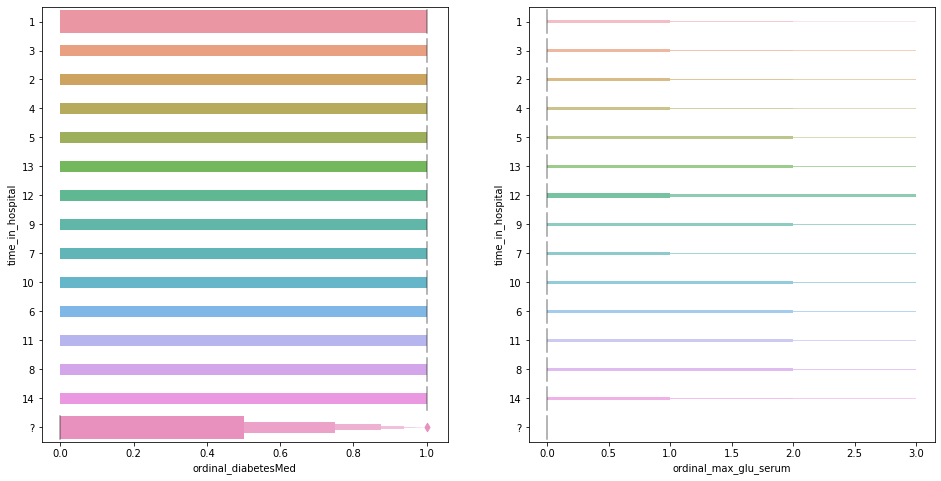

In [117]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxenplot(df['ordinal_diabetesMed'], df['time_in_hospital'])

plt.subplot(1,2,2)
sns.boxenplot(df['ordinal_max_glu_serum'], df['time_in_hospital'])
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

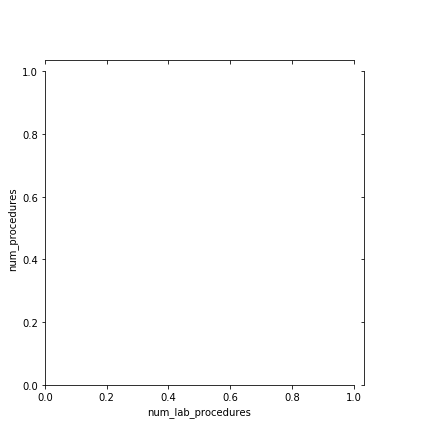

In [118]:
# num_lab_procedures is correlated to num_procedures
# num_medications is correlated to time_in_hospital
# num_medications is correlated to number_diagnoses
sns.jointplot('num_lab_procedures', 'num_procedures', kind = 'reg', data = df)
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

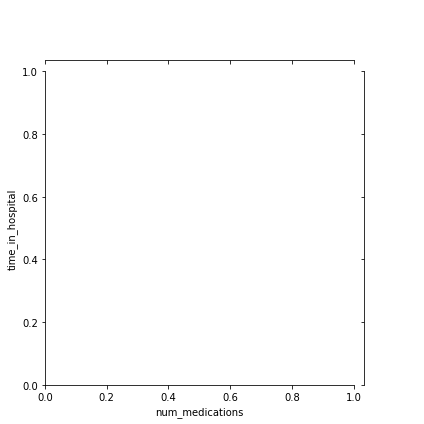

In [124]:
# num_medications is correlated to time_in_hospital

sns.jointplot('num_medications', 'time_in_hospital', kind = 'reg', data = df)

plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

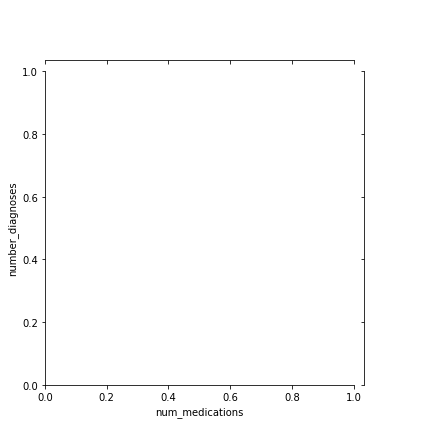

In [125]:
# num_medications is correlated to number_diagnoses
sns.jointplot('num_medications', 'number_diagnoses', kind = 'reg', data = df)

plt.show()

## Adding Readmitted Binary into DF2

In [ ]:
df2['readmitted_binary'] = df2['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

## Determine Relationship between Race and Readmission

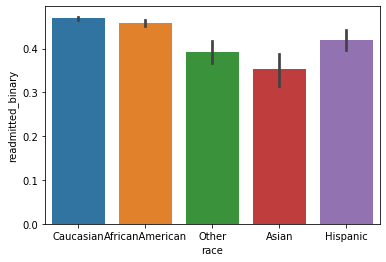

In [119]:
sns.barplot(x= 'race', y ='readmitted_binary', data = df_cat)

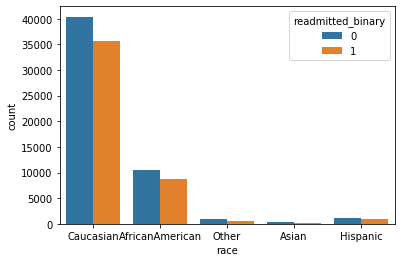

In [120]:
sns.countplot('race', hue = 'readmitted_binary', data = df_cat)

In [121]:
count_table = pd.crosstab(df_cat['readmitted_binary'], df_cat['race'])
count_table

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other
readmitted_binary,,,,,
0,10421,415,40383,1183,915
1,8789,226,35716,854,591


In [122]:
stats.chisquare(count_table, axis = None)

Power_divergenceResult(statistic=211664.74165016637, pvalue=0.0)

In [123]:
type(count_table)

pandas.core.frame.DataFrame

**Conclusion:** Race has an impact on readmission rates

## Determine Relationship between Gender and Readmission

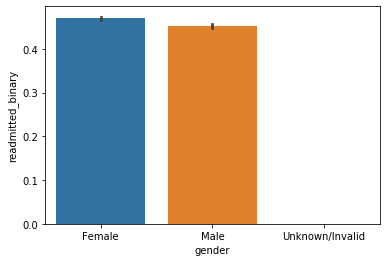

In [126]:
sns.barplot(x= 'gender', y ='readmitted_binary', data = df_cat)

In [127]:
count_table1 = pd.crosstab(df_cat['readmitted_binary'], df_cat['gender'])
count_table1

gender,Female,Male,Unknown/Invalid
readmitted_binary,,,
0,29038,25823,3
1,25670,21232,0


In [128]:
stats.chisquare(count_table1, axis = None)

Power_divergenceResult(statistic=52693.023996226635, pvalue=0.0)

**Conclusion:** Gender has an impact on readmission rates

## Determine Relationship between Insulin and Readmission

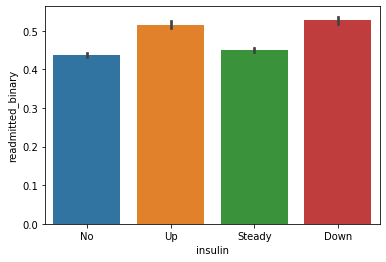

In [129]:
sns.barplot(x= 'insulin', y ='readmitted_binary', data = df_cat)

In [130]:
count_table2 = pd.crosstab(df_cat['readmitted_binary'], df_cat['insulin'])
count_table2

insulin,Down,No,Steady,Up
readmitted_binary,,,,
0,5768,26678,16934,5484
1,6450,20705,13915,5832


In [131]:
stats.chisquare(count_table2, axis = None)

Power_divergenceResult(statistic=36571.68402020321, pvalue=0.0)

#Determine relationships between your input variables and your outcome. Which features have the strongest relationship?

## Determine Relationship between Time in Hospital and Readmission

(array([31431., 17756., 13923., 17505.,  5859.,  4391.,  5344.,  1855.,
         1447.,  2252.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 10 Patch objects>)

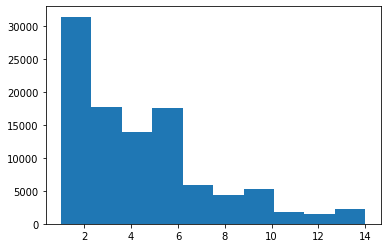

In [132]:
plt.hist(df2['time_in_hospital'])

In [133]:
admitted_time = df2.loc[df2['readmitted_binary']==0, 'time_in_hospital'] 
not_admitted_time = df2.loc[df2['readmitted_binary']==1, 'time_in_hospital']

In [134]:
age_list=df2['age'].unique()

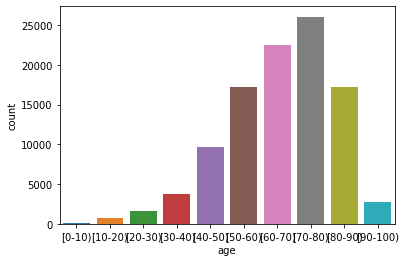

In [135]:
sns.countplot(df2['age'])

In [136]:
age_dic={}
for i in range(len(age_list)):
    age_dic[age_list[i]]=i


df2['age_rank'] = df['age'].map(age_dic)

In [137]:
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary,age_rank
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,NO,0,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,No,No,No,No,Ch,Yes,>30,1,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,Yes,NO,0,2
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,No,No,No,No,Ch,Yes,NO,0,3
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,No,No,No,No,Ch,Yes,NO,0,4


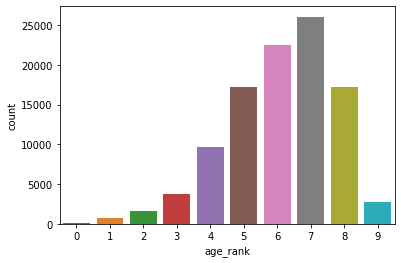

In [138]:
sns.countplot(df2['age_rank'])

In [139]:
df_num = df2.select_dtypes(include='number').copy()

In [140]:
df_num.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary,age_rank
0,6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1,1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,1,1
2,1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0,0,2
3,1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,0,3
4,1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,0,4


In [141]:
df_num.drop(['admission_type_id','discharge_disposition_id','admission_source_id','readmitted_binary','age_rank'], axis=1, inplace=True);

In [142]:
df_num.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0
2,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0
3,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0


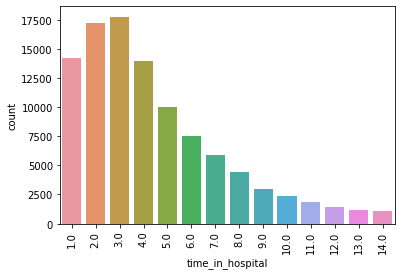

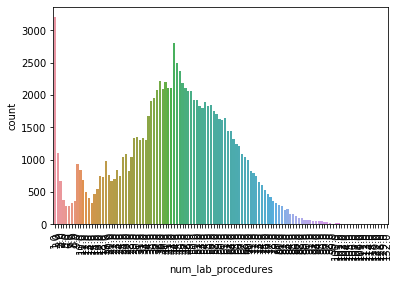

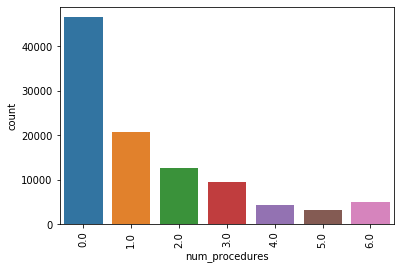

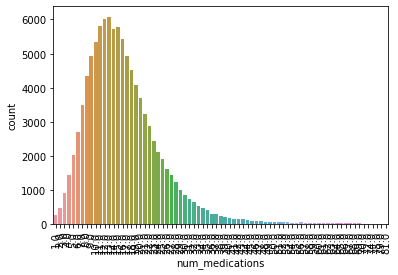

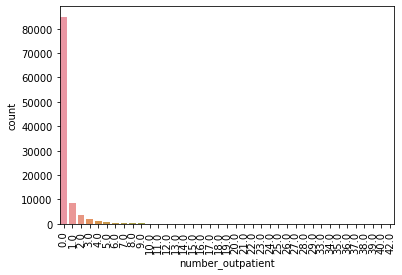

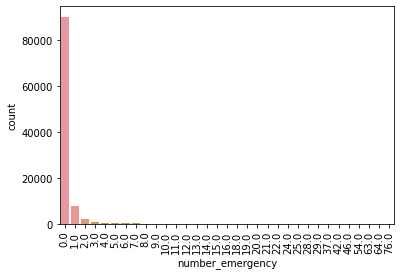

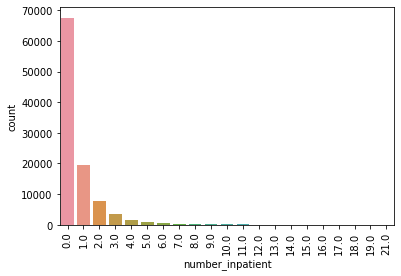

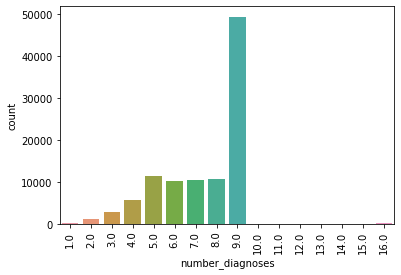

In [143]:
for name in df_num.columns:
    sns.countplot(df_num[name])
    plt.xticks(rotation=90)
    plt.show()
    

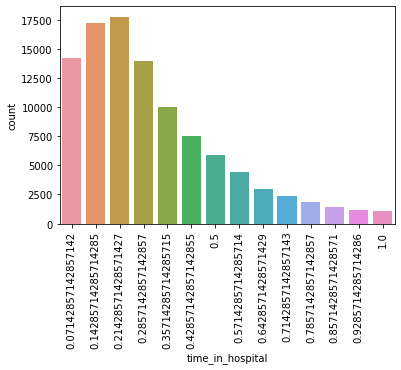

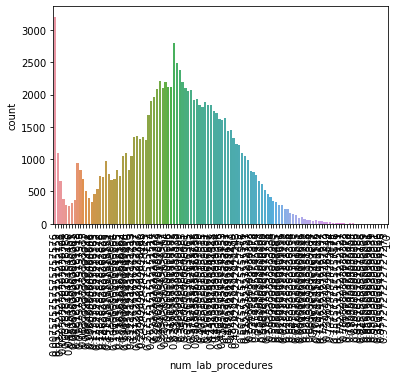

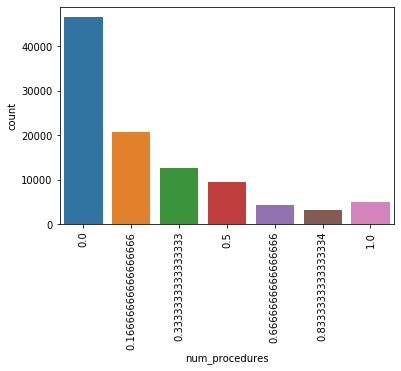

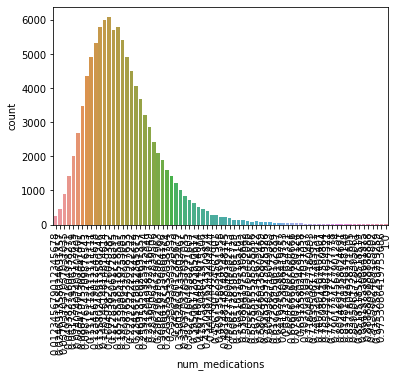

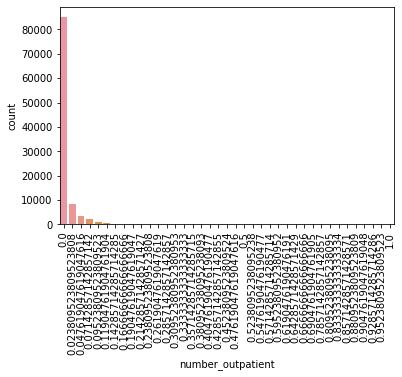

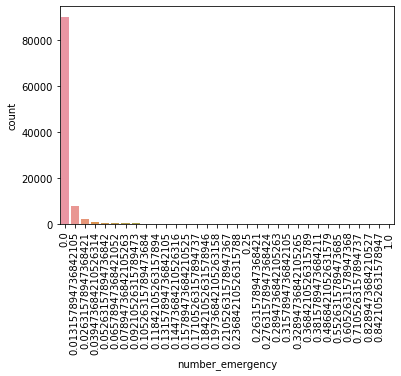

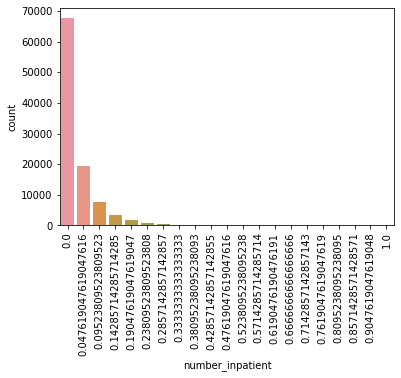

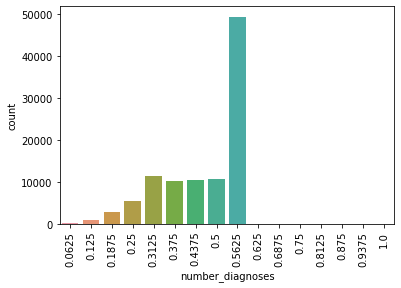

In [144]:
# scale to max
for name in df_num.columns:
    sns.countplot(df_num[name]/df_num[name].max()  )
    plt.xticks(rotation =90)
    plt.show()

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
scaler= StandardScaler()

In [147]:
df_num.drop('scale_num_med',axis=1);


KeyError: "['scale_num_med'] not found in axis"

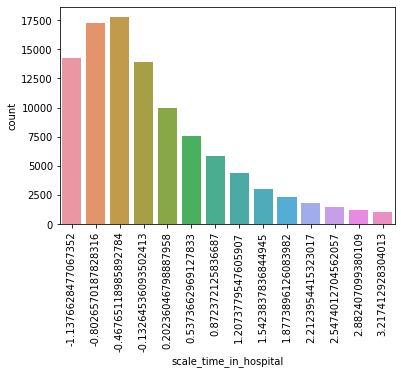

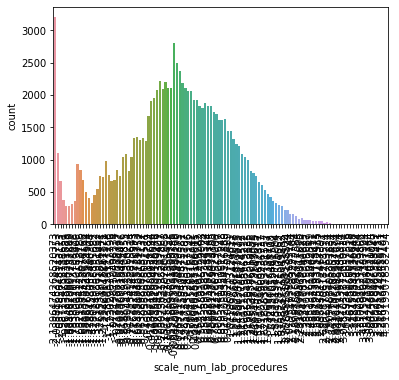

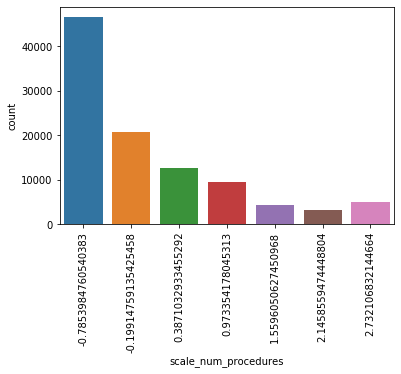

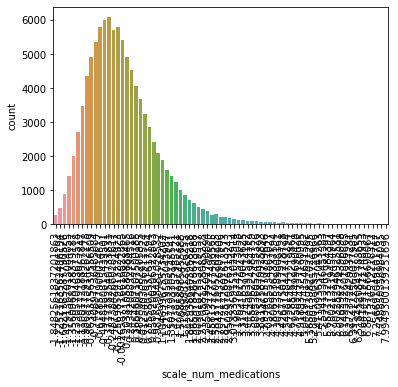

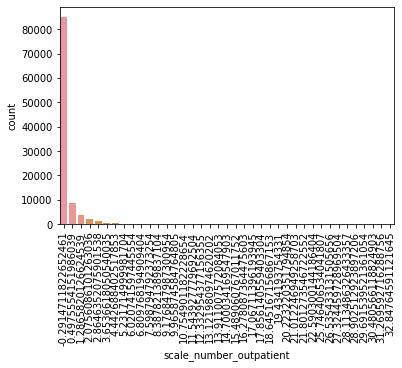

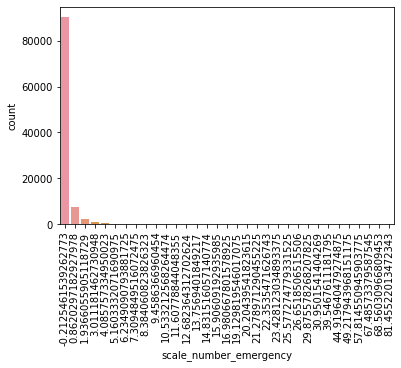

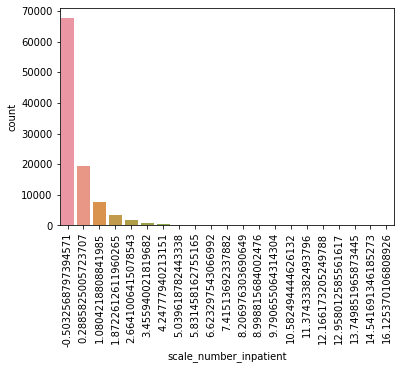

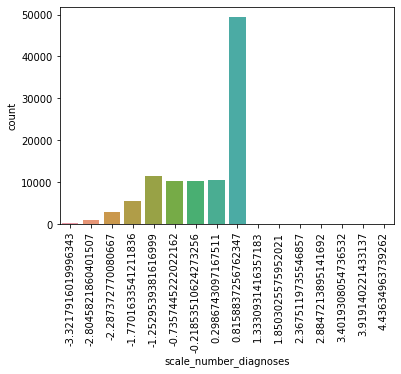

In [148]:
for name in df_num.columns:
    df_num['scale_'+name]=scaler.fit_transform(df_num[[name]])
    sns.countplot(df_num['scale_'+name])
    plt.xticks(rotation =90)
    plt.show()

## Combining two problematic features

Number of diagnoses and age group

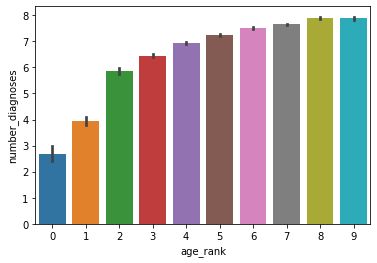

In [149]:
sns.barplot(data = df2, x= 'age_rank', y= 'number_diagnoses')

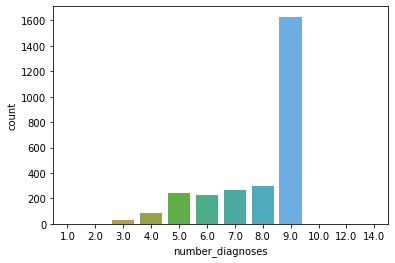

In [150]:
#Frequency of number of diagnoses for age group 9
sns.countplot(df2.loc[df2['age_rank']==9, 'number_diagnoses'])

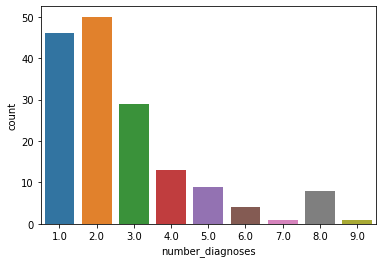

In [151]:
#Frequency of number of diagnoses for age group 0
sns.countplot(df2.loc[df2['age_rank']==0, 'number_diagnoses'])

In [152]:
# Continuous to categorical: t-test, ANOVA or boxen
# Categorical max_glu_serum , diabetesMed, time_in_hospital
df['ordinal_max_glu_serum'] = df['max_glu_serum'].map({'None': 0, 'Norm': 1, '>200': 2, '>300': 3})
df['ordinal_max_glu_serum'].value_counts()

0    96420
1     2597
2     1485
3     1264
Name: ordinal_max_glu_serum, dtype: int64

## Feature Selection

In [153]:
from sklearn.feature_selection import SelectKBest, f_classif

In [154]:
 df2.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_binary', 'age_rank'],
      dtype='object')

In [166]:
df2 = df2.fillna(0)
y=df2['readmitted_binary']
X=df2.drop(columns=['race', 'gender', 'age','diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted','readmitted_binary'], axis=1)

In [167]:
k  = 5
kbest = SelectKBest(k=k, score_func= f_classif)
X_best_feature = kbest.fit_transform(X,y)
X_best_feature = pd.DataFrame(X_best_feature, columns = X.columns[kbest.get_support()])
X_best_feature.columns


Index(['time_in_hospital', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient'],
      dtype='object')

In [168]:
X_best_feature.head()

,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient
0,1.0,1.0,0.0,0.0,0.0
1,3.0,18.0,0.0,0.0,0.0
2,2.0,13.0,2.0,0.0,1.0
3,2.0,16.0,0.0,0.0,0.0
4,1.0,8.0,0.0,0.0,0.0


In [169]:
kbest.scores_

array([2.43326054e+00, 2.25759597e+01, 1.62000649e+02, 2.67770611e+02,
       1.58515236e+02, 2.04155245e+02, 2.22543592e+02, 6.91665077e+02,
       1.09014879e+03, 5.03847755e+03, 9.41519557e+01])

In [170]:
pd.Series(kbest.scores_, index=X.columns)

admission_type_id              2.433261
discharge_disposition_id      22.575960
admission_source_id          162.000649
time_in_hospital             267.770611
num_lab_procedures           158.515236
num_procedures               204.155245
num_medications              222.543592
number_outpatient            691.665077
number_emergency            1090.148792
number_inpatient            5038.477547
age_rank                      94.151956
dtype: float64

## **PCA**

In [171]:
from sklearn.decomposition import PCA

In [172]:
pca = PCA(n_components =10)
X_pca =pca.fit_transform(X)
cov = np.cov(X_pca.T)

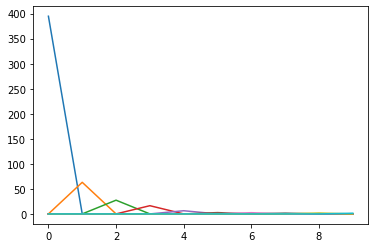

In [173]:
plt.plot(cov);

## Logistic Regression Model

## First Trial

### Train Test Split

In [174]:
from sklearn.model_selection import train_test_split, cross_val_score

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 76324 training samples and 25442 test samples


## Create the Model

In [176]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', penalty = 'l2',  max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Confusion Matrix

In [180]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

y_predict = lr.predict(X_test)
confusion = confusion_matrix(y_test, y_predict)
print(confusion)

[[11342  2322]
 [ 7497  4281]]


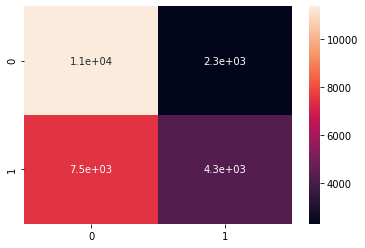

In [193]:
sns.heatmap(confusion, annot=True)

In [190]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

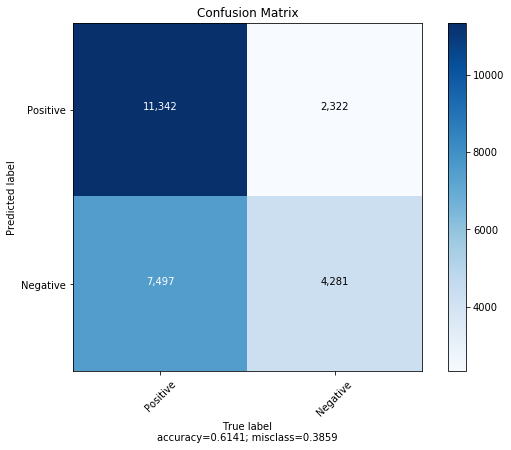

In [191]:
plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix', normalize=False)


## Calculate Metrics

In [195]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
fbeta_precision = fbeta_score(y_test, y_predict, 0.5)
fbeta_recall = fbeta_score(y_test, y_predict, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.61
Precision score: 0.65
Recall score: 0.36
F1 score: 0.47
Fbeta score favoring precision: 0.56
FBeta score favoring recall: 0.40


## ROC Curve and AUC

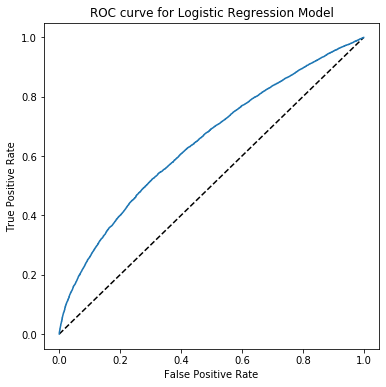

Area under the ROC curve: 0.646


In [196]:
probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

## Cross Validation

In [197]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.61369145 0.61349492 0.61231575 0.61690141 0.62015199]
Mean cross validation score: 0.615


## Second Trial

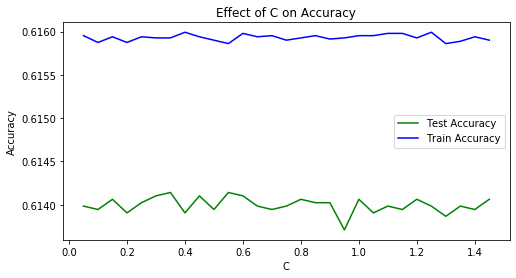

In [201]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', C=c, max_iter=1000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [202]:
lr = LogisticRegression(solver='lbfgs', penalty = 'l2',  max_iter=1000, C = .375)
lr.fit(X_train, y_train)

LogisticRegression(C=0.375, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
clf = LogisticRegression(solver='lbfgs', penalty = 'l2',  max_iter=1000, C = .375)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.61362594 0.61356043 0.61244677 0.6168359  0.62047956]
Mean cross validation score: 0.615


In [206]:
clf = LogisticRegression(solver='lbfgs', penalty = 'l2',  max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.61369145 0.61349492 0.61231575 0.61690141 0.62015199]
Mean cross validation score: 0.615


In [207]:
clf = LogisticRegression(solver='lbfgs', penalty = 'l2',  max_iter=2000, C = .375)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.61362594 0.61356043 0.61244677 0.6168359  0.62047956]
Mean cross validation score: 0.615


In [208]:
clf = LogisticRegression(solver='lbfgs', penalty = 'none',  max_iter=1000, C = .375)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.61369145 0.61342941 0.61244677 0.61677039 0.62028302]
Mean cross validation score: 0.615


In [209]:
clf = LogisticRegression(solver='liblinear', penalty = 'l2',  max_iter=1000, C = .375)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.61369145 0.61342941 0.61270881 0.61703243 0.62034853]
Mean cross validation score: 0.615


In [204]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
fbeta_precision = fbeta_score(y_test, y_predict, 0.5)
fbeta_recall = fbeta_score(y_test, y_predict, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.61
Precision score: 0.65
Recall score: 0.36
F1 score: 0.47
Fbeta score favoring precision: 0.56
FBeta score favoring recall: 0.40


In [215]:
y_train.value_counts()

0    41200
1    35124
Name: readmitted_binary, dtype: int64

- Go back to your diabetes data set, and create a logistic regression model
- Evaluate your model, using cross validation and train-test splitting
- Use each of the metrics we went over
- Create a confusion matrix and an ROC curve
- Vary your hyperparameters and see the results on your metrics